In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, classification_report
import kaleido

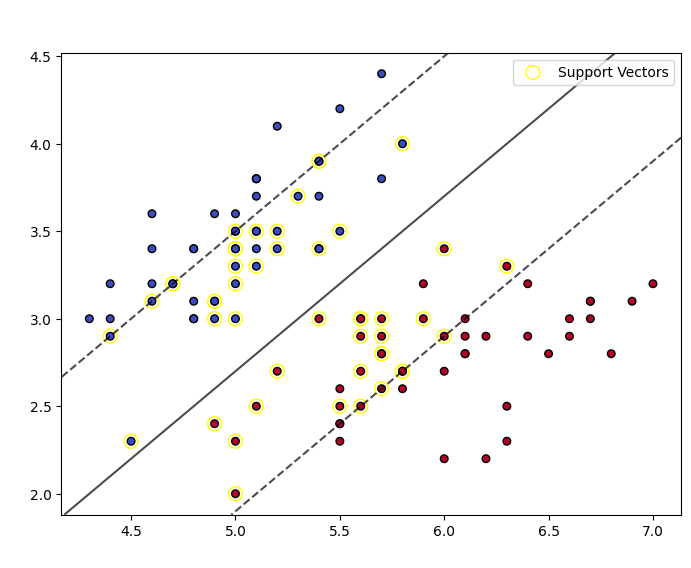

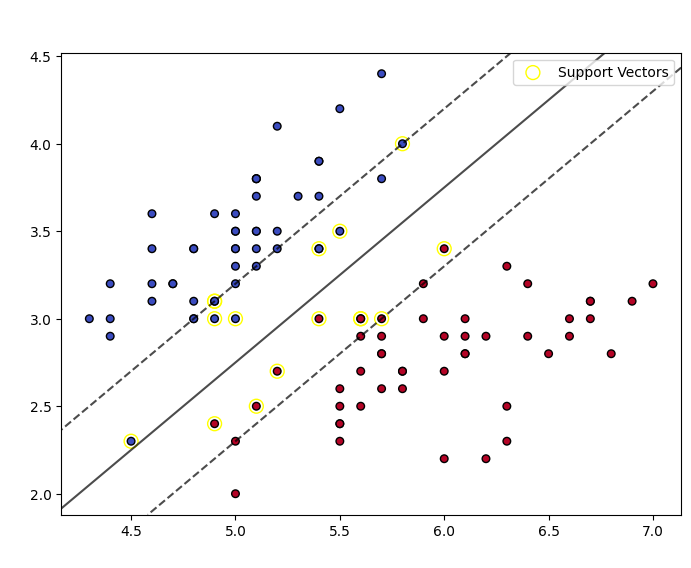

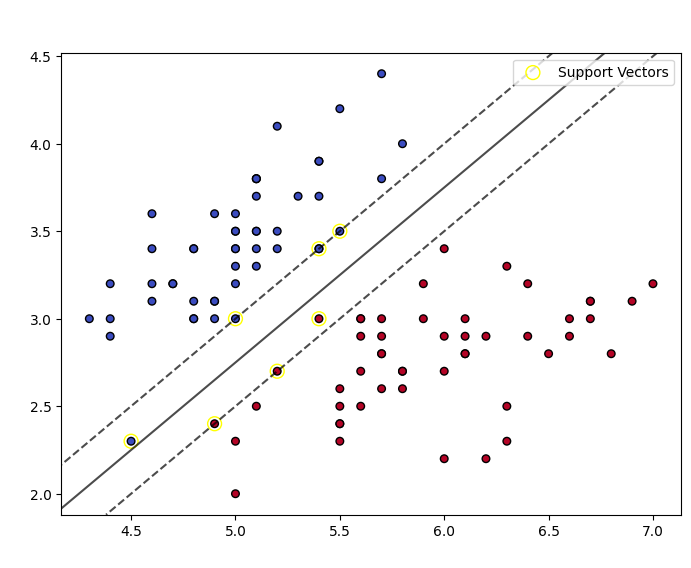

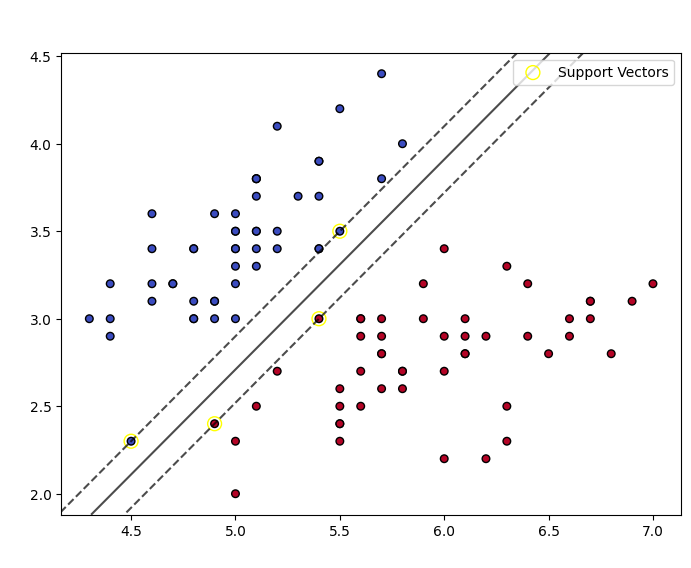

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X, y = X[y != 2], y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.1, 1, 10, 100]

def plot_decision_boundary(X, y, model, accuracy, C_value):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm', edgecolors='k')

    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])

    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='yellow', label='Support Vectors')

    plt.title(f'SVM Decision Boundary (C={C_value})\nAccuracy: {accuracy * 100:.2f}%', color='white')
    plt.xlabel('Sepal Length', color='white')
    plt.ylabel('Sepal Width', color='white')
    plt.legend()
    plt.show()

for C_value in C_values:
    svm = SVC(kernel='linear', C=C_value)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    plot_decision_boundary(X, y, svm, accuracy, C_value)

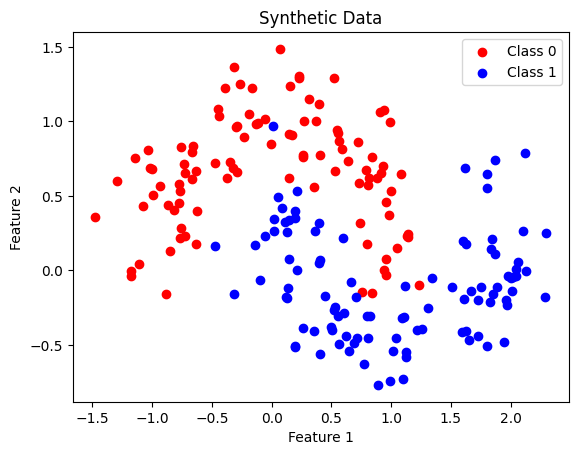

In [5]:
def generate_data():
    X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.title('Synthetic Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

X, y = generate_data()
plot_data(X, y)

In [6]:
pip install -U kaleido

In [11]:
def plot_3d_data(X, y):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=X[y == 0][:, 0],
        y=X[y == 0][:, 1],
        z=np.zeros(len(X[y == 0])),
        mode='markers',
        marker=dict(color='red', size=5),
        name='Class 0'
    ))
    fig.add_trace(go.Scatter3d(
        x=X[y == 1][:, 0],
        y=X[y == 1][:, 1],
        z=np.ones(len(X[y == 1])),
        mode='markers',
        marker=dict(color='blue', size=5),
        name='Class 1'
    ))
    fig.update_layout(
        title="3D View of Data",
        scene=dict(
            xaxis_title="Feature 1",
            yaxis_title="Feature 2",
            zaxis_title="Class Labels"
        ),
        showlegend=True
    )
    fig.show()
    fig.write_image("Transformed3DSpace.png")

def train_polynomial_svm(X_train, y_train, degree):
    svm = SVC(kernel='poly', degree=degree, C=1.0, random_state=42)
    svm.fit(X_train, y_train)
    return svm

X, y = generate_data()
plot_3d_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
polynomial_degree = 3
svm_model = train_polynomial_svm(X_train, y_train, polynomial_degree)
y_pred = svm_model.predict(X_test)

In [12]:
def visualize_decision_boundary_3d(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = go.Figure()
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=Z,
        colorscale='RdBu', opacity=0.7,
        contours=dict(z=dict(show=True))
    ))
    fig.add_trace(go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=y,
        mode='markers',
        marker=dict(color=['red' if label == 0 else 'blue' for label in y], size=5)
    ))
    fig.update_layout(
        title="3D Decision Boundary with Polynomial SVM",
        scene=dict(
            xaxis_title="Feature 1",
            yaxis_title="Feature 2",
            zaxis_title="Decision Function"
        ),
    )
    fig.show()
    fig.write_image("Transformed3DSpacewithBoundary.png")

X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
polynomial_degree = 3
svm_model = SVC(kernel='poly', degree=polynomial_degree, C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

visualize_decision_boundary_3d(svm_model, X, y)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.93      0.96      0.95        28

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

